In [21]:
import pandas as pd
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

In [22]:
df=pd.read_csv('../Data/analysis_files/df_fig1.csv')

In [23]:
color_map = {'BioGraph*':'yellowgreen', 'breakdancer':'peru', 'clever':'gold', 'delly':'darkorange', 'delly':'mediumorchid', 
             'gasv':'firebrick', 'gridss':'cornflowerblue', 'indelminer':'forestgreen', 
             'mistrvar':'salmon', 'pindel':'darkorange', 'popdel':'navy', 'rdxplorer':'darkgray', 
             'smoove':'orangered',  'true deletions':'black',  'crest':'red', 'genomestrip':'pink','manta_diploidSV':'aqua','Tardis':'lime'}

In [24]:
df.head()

,length,strain,tool
0,730,LP_J,true deletions
1,2613,LP_J,true deletions
2,1341,LP_J,true deletions
3,226,LP_J,true deletions
4,725,LP_J,true deletions


In [25]:
tools=['pindel','clever','mistrvar','indelminer', 'BioGraph*', 'gridss','breakdancer','true deletions','smoove','delly','rdxplorer','popdel','gasv','crest','genomestrip','manta_diploidSV','Tardis']

In [26]:
# for t in tools:
#     tl=df.loc[df['tool'] == t]
#     t1=tl[['length']]
#     tx=t1.values
#     print(t)
#     print(len(tx))
#     print(stats.ttest_ind(tx,y))

In [27]:
# for t in tools:
#     tl=df.loc[df['tool'] == t]
#     t1=tl[['length']]
#     tx=t1.values
#     print(t)
#     print(len(tx))
#     print(sp.stats.mannwhitneyu(tx,y))

In [28]:
# tx

In [29]:
# test=[1,2,3,4]

In [30]:
(stats.ttest_ind(test,test))

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [31]:

smoove=df.loc[df['tool'] == 'smoove']
smoove1 = smoove[['length']]

In [32]:
smoove1
x=smoove1.values

In [33]:
true=df.loc[df['tool'] == 'true deletions']
true1 = true[['length']]

In [34]:
y=true1.values

In [35]:
x

array([[2457],
       [1726],
       [ 578],
       ...,
       [ 593],
       [  51],
       [ 216]])

In [36]:
#try t-test
sp.stats.mannwhitneyu(y,y)

MannwhitneyuResult(statistic=6882050.0, pvalue=0.4999978379419172)

Tool
BioGraph*          201.0
BreakDancer        392.0
CLEVER             107.0
CREST              548.5
DELLY              473.0
GASV              1404.0
GRIDSS             334.5
GenomeSTRiP       3060.0
LUMPY              430.0
Manta              212.0
MiStrVar           117.0
Pindel              64.0
PopDel             963.0
RDXplorer          799.0
Tardis             477.0
indelMINER         198.0
true deletions     398.0
Name: length, dtype: float64
Index(['GenomeSTRiP', 'GASV', 'PopDel', 'RDXplorer', 'CREST', 'Tardis',
       'DELLY', 'LUMPY', 'true deletions', 'BreakDancer', 'GRIDSS', 'Manta',
       'BioGraph*', 'indelMINER', 'MiStrVar', 'CLEVER', 'Pindel'],
      dtype='object', name='Tool')


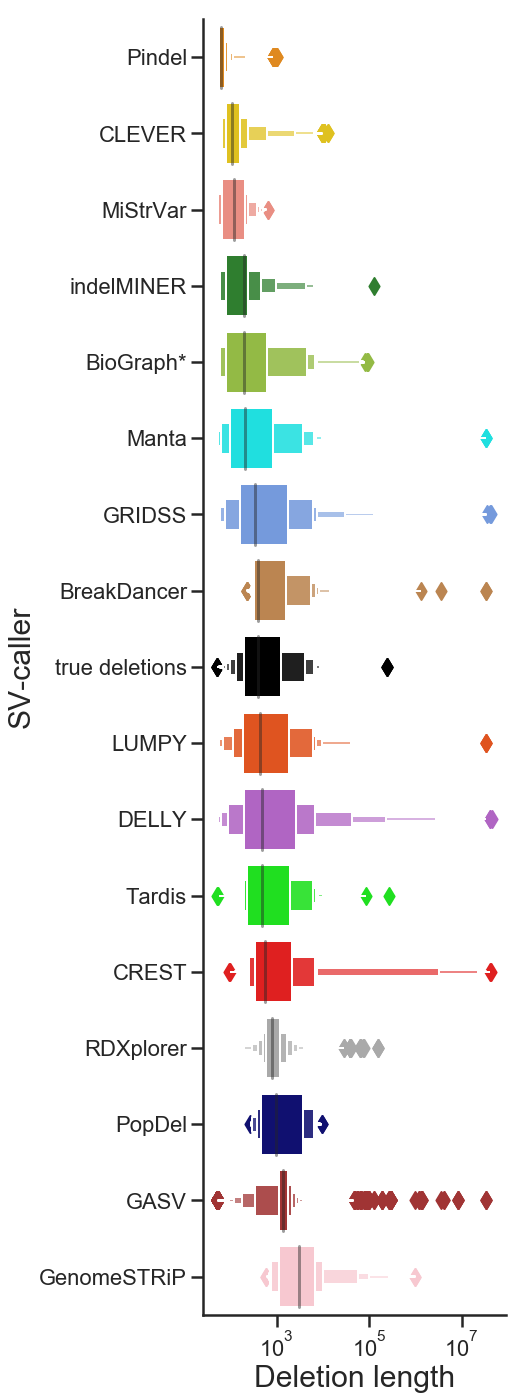

In [37]:

fig1g=sns.set_style("ticks")
fig1g=sns.set_context("poster",rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30})
labels=['Pindel','CLEVER','MiStrVar','indelMINER', 'BioGraph*','Manta','GRIDSS','BreakDancer','true deletions','LUMPY','DELLY','Tardis','CREST','RDXplorer','PopDel','GASV','GenomeSTRiP']
fig_order=['pindel','clever','mistrvar','indelminer', 'BioGraph*','manta_diploidSV', 'gridss','breakdancer','true deletions','smoove','delly','Tardis','crest','rdxplorer','popdel','gasv','genomestrip']

# labels    = ['true deletions','indelminer','sniffles','popdel','mistrvar','lumpy','BioGraph*','breakdancer','delly','gridss','clever','rdxplorer','pindel','gasv']
# fig_order =['true deletions','indelminer','sniffles','popdel','mistrvar','smoove','BioGraph*','breakdancer','delly','gridss','clever','rdxplorer','pindel','gasv']
df["Tool"] = df["tool"].map(dict(zip(fig_order, labels)))
test=df.groupby("Tool")["length"].median()
print(test)
ranks = df.groupby("Tool")["length"].median().fillna(0).sort_values()[::-1].index
print(ranks)
pal = []
for tool in fig_order:
    pal.append(color_map[tool])
fig1g = sns.catplot(x="length", y="Tool",kind='boxen',data=df.sort_values("length"),height=20, aspect=.4, palette=pal,order=labels)
#fig1g = sns.catplot(x="tool", y="length",kind='boxen',data=df, aspect=12, palette=pal, order=fig_order)
# fig1g.invert_yaxis()
fig1g.set(xscale="log");
fig1g.set(ylabel='SV-caller')
fig1g.set(xlabel='Deletion length')
# sns.set(rc={'figure.figsize':(1,1)})
fig1g=sns.despine()
plt.savefig("../Figures/fig2/fig2.svg", bbox_inches='tight')
plt.savefig("../Figures/fig2/fig2.eps", bbox_inches='tight')
plt.savefig("../Figures/fig2/fig2", bbox_inches='tight')
plt.savefig("../Figures/fig2/fig2.pdf", bbox_inches='tight')